# 2.1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

t_w=pd.read_csv('today_world_2020_03_31.csv')
t_w.head()

,id,lastUpdateTime,name,total_confirm,total_suspect,total_heal,total_dead,total_severe,today_confirm,today_suspect,today_heal,today_dead,today_severe,today_storeConfirm
0,9577772,2020-03-30 08:29:52,突尼斯,312,0,2,8,0,NaN,0.0,NaN,NaN,0.0,NaN
1,9507896,2020-03-31 13:14:50,塞尔维亚,785,0,0,16,0,44.0,0.0,0.0,3.0,0.0,NaN
2,0,2020-03-31 18:11:03,中国,82599,183,76237,3314,528,151.0,44.0,300.0,3.0,-105.0,NaN
3,1,2020-03-31 10:47:59,日本,2720,0,1027,70,0,19.0,NaN,0.0,0.0,NaN,NaN
4,2,2020-03-31 13:00:41,泰国,1651,0,127,10,0,127.0,0.0,0.0,1.0,0.0,NaN


In [2]:
name_dict = {'date':'日期','name':'名称','id':'编号','lastUpdateTime':'更新时间',
             'today_confirm':'当日新增确诊','today_suspect':'当日新增疑似',
             'today_heal':'当日新增治愈','today_dead':'当日新增死亡',
             'today_severe':'当日新增重症','today_storeConfirm':'当日现存确诊',
             'total_confirm':'累计确诊','total_suspect':'累计疑似',
             'total_heal':'累计治愈','total_dead':'累计死亡','total_severe':'累计重症'}
t_w.rename(columns=name_dict,inplace=True)
t_w.head()

,编号,更新时间,名称,累计确诊,累计疑似,累计治愈,累计死亡,累计重症,当日新增确诊,当日新增疑似,当日新增治愈,当日新增死亡,当日新增重症,当日现存确诊
0,9577772,2020-03-30 08:29:52,突尼斯,312,0,2,8,0,NaN,0.0,NaN,NaN,0.0,NaN
1,9507896,2020-03-31 13:14:50,塞尔维亚,785,0,0,16,0,44.0,0.0,0.0,3.0,0.0,NaN
2,0,2020-03-31 18:11:03,中国,82599,183,76237,3314,528,151.0,44.0,300.0,3.0,-105.0,NaN
3,1,2020-03-31 10:47:59,日本,2720,0,1027,70,0,19.0,NaN,0.0,0.0,NaN,NaN
4,2,2020-03-31 13:00:41,泰国,1651,0,127,10,0,127.0,0.0,0.0,1.0,0.0,NaN


In [3]:
t_w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   编号      198 non-null    object 
 1   更新时间    198 non-null    object 
 2   名称      198 non-null    object 
 3   累计确诊    198 non-null    int64  
 4   累计疑似    198 non-null    int64  
 5   累计治愈    198 non-null    int64  
 6   累计死亡    198 non-null    int64  
 7   累计重症    198 non-null    int64  
 8   当日新增确诊  118 non-null    float64
 9   当日新增疑似  161 non-null    float64
 10  当日新增治愈  118 non-null    float64
 11  当日新增死亡  118 non-null    float64
 12  当日新增重症  161 non-null    float64
 13  当日现存确诊  0 non-null      float64
dtypes: float64(6), int64(5), object(3)
memory usage: 21.8+ KB


In [4]:
t_w.describe()

,累计确诊,累计疑似,累计治愈,累计死亡,累计重症,当日新增确诊,当日新增疑似,当日新增治愈,当日新增死亡,当日新增重症,当日现存确诊
count,198.000000,198.000000,198.000000,198.000000,198.000000,118.000000,161.000000,118.000000,118.000000,161.000000,0.0
mean,4037.398990,0.924242,849.646465,194.737374,2.666667,469.237288,0.273292,103.466102,23.805085,-0.652174,NaN
std,17471.623547,13.005244,5833.524675,1094.260936,37.523326,2121.255928,3.467686,528.125514,111.088112,8.275159,NaN
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-105.000000,NaN
25%,14.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,131.500000,0.000000,3.000000,1.000000,0.000000,45.500000,0.000000,0.500000,1.000000,0.000000,NaN
75%,777.750000,0.000000,38.500000,12.750000,0.000000,140.000000,0.000000,11.750000,4.000000,0.000000,NaN
max,164603.000000,183.000000,76237.000000,11591.000000,528.000000,20349.000000,44.000000,5019.000000,849.000000,0.000000,NaN


In [5]:
t_w_nan = t_w.isnull().sum()
t_w_nan

编号          0
更新时间        0
名称          0
累计确诊        0
累计疑似        0
累计治愈        0
累计死亡        0
累计重症        0
当日新增确诊     80
当日新增疑似     37
当日新增治愈     80
当日新增死亡     80
当日新增重症     37
当日现存确诊    198
dtype: int64

In [6]:
today_world_nan = t_w.isnull().sum()/len(t_w)
today_world_nan.apply(lambda x: format(x, '.1%')) 

编号          0.0%
更新时间        0.0%
名称          0.0%
累计确诊        0.0%
累计疑似        0.0%
累计治愈        0.0%
累计死亡        0.0%
累计重症        0.0%
当日新增确诊     40.4%
当日新增疑似     18.7%
当日新增治愈     40.4%
当日新增死亡     40.4%
当日新增重症     18.7%
当日现存确诊    100.0%
dtype: object

In [7]:
# 当日现存确诊=累计确诊−累计治愈−累计死亡
t_w['当日现存确诊']=t_w['累计确诊']-t_w['累计治愈']-t_w['累计死亡']

In [8]:
t_w['病死率'] = (t_w['累计死亡']/t_w['累计确诊']).apply(lambda x: format(x, '.2f')) 
t_w['病死率'] = t_w['病死率'].astype('float')
t_w.sort_values('病死率',ascending=False,inplace=True)
t_w.head(10)

,编号,更新时间,名称,累计确诊,累计疑似,累计治愈,累计死亡,累计重症,当日新增确诊,当日新增疑似,当日新增治愈,当日新增死亡,当日新增重症,当日现存确诊,病死率
137,95291,2020-03-31 17:12:37,苏丹,7,0,0,2,0,1.0,0.0,0.0,0.0,0.0,5,0.29
181,956789,2020-03-31 14:26:05,安哥拉,7,0,1,2,0,0.0,0.0,1.0,0.0,0.0,4,0.29
122,95783,2020-03-30 09:33:45,冈比亚,4,0,0,1,0,NaN,0.0,NaN,NaN,0.0,3,0.25
121,95787,2020-03-29 12:40:40,尼加拉瓜,4,0,0,1,0,NaN,0.0,NaN,NaN,0.0,3,0.25
120,95303,2020-03-20 06:07:07,圭亚那,5,0,0,1,0,NaN,0.0,NaN,NaN,0.0,4,0.20
182,87656,2020-03-27 11:32:45,开曼群岛,5,0,0,1,0,NaN,0.0,NaN,NaN,0.0,4,0.20
118,95306,2020-03-31 00:00:31,佛得角,6,0,0,1,0,NaN,NaN,NaN,NaN,NaN,5,0.17
116,95309,2020-03-31 00:00:31,尼日尔,22,0,0,3,0,NaN,NaN,NaN,NaN,NaN,19,0.14
131,856671,2020-03-31 00:00:31,荷属安的列斯,7,0,0,1,0,NaN,NaN,NaN,NaN,NaN,6,0.14
105,8162,2020-03-31 07:37:20,津巴布韦,8,0,0,1,0,1.0,0.0,0.0,0.0,0.0,7,0.12


In [9]:
t_w.set_index('名称',inplace=True)
t_w.head()

,编号,更新时间,累计确诊,累计疑似,累计治愈,累计死亡,累计重症,当日新增确诊,当日新增疑似,当日新增治愈,当日新增死亡,当日新增重症,当日现存确诊,病死率
名称,,,,,,,,,,,,,,
苏丹,95291,2020-03-31 17:12:37,7,0,0,2,0,1.0,0.0,0.0,0.0,0.0,5,0.29
安哥拉,956789,2020-03-31 14:26:05,7,0,1,2,0,0.0,0.0,1.0,0.0,0.0,4,0.29
冈比亚,95783,2020-03-30 09:33:45,4,0,0,1,0,NaN,0.0,NaN,NaN,0.0,3,0.25
尼加拉瓜,95787,2020-03-29 12:40:40,4,0,0,1,0,NaN,0.0,NaN,NaN,0.0,3,0.25
圭亚那,95303,2020-03-20 06:07:07,5,0,0,1,0,NaN,0.0,NaN,NaN,0.0,4,0.20


In [10]:
t_w.loc['中国']

编号                          0
更新时间      2020-03-31 18:11:03
累计确诊                    82599
累计疑似                      183
累计治愈                    76237
累计死亡                     3314
累计重症                      528
当日新增确诊                    151
当日新增疑似                     44
当日新增治愈                    300
当日新增死亡                      3
当日新增重症                   -105
当日现存确诊                   3048
病死率                      0.04
Name: 中国, dtype: object

In [11]:
w_10=t_w.sort_values('累计确诊',ascending=False)[:10]
w_10=w_10[['累计确诊','累计死亡','病死率']]
w_10

,累计确诊,累计死亡,病死率
名称,,,
美国,164603,3070,0.02
意大利,101739,11591,0.11
西班牙,94417,8189,0.09
中国,82599,3314,0.04
德国,66885,645,0.01
法国,45169,3030,0.07
伊朗,44606,2898,0.06
英国,22453,1411,0.06
瑞士,16176,373,0.02


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


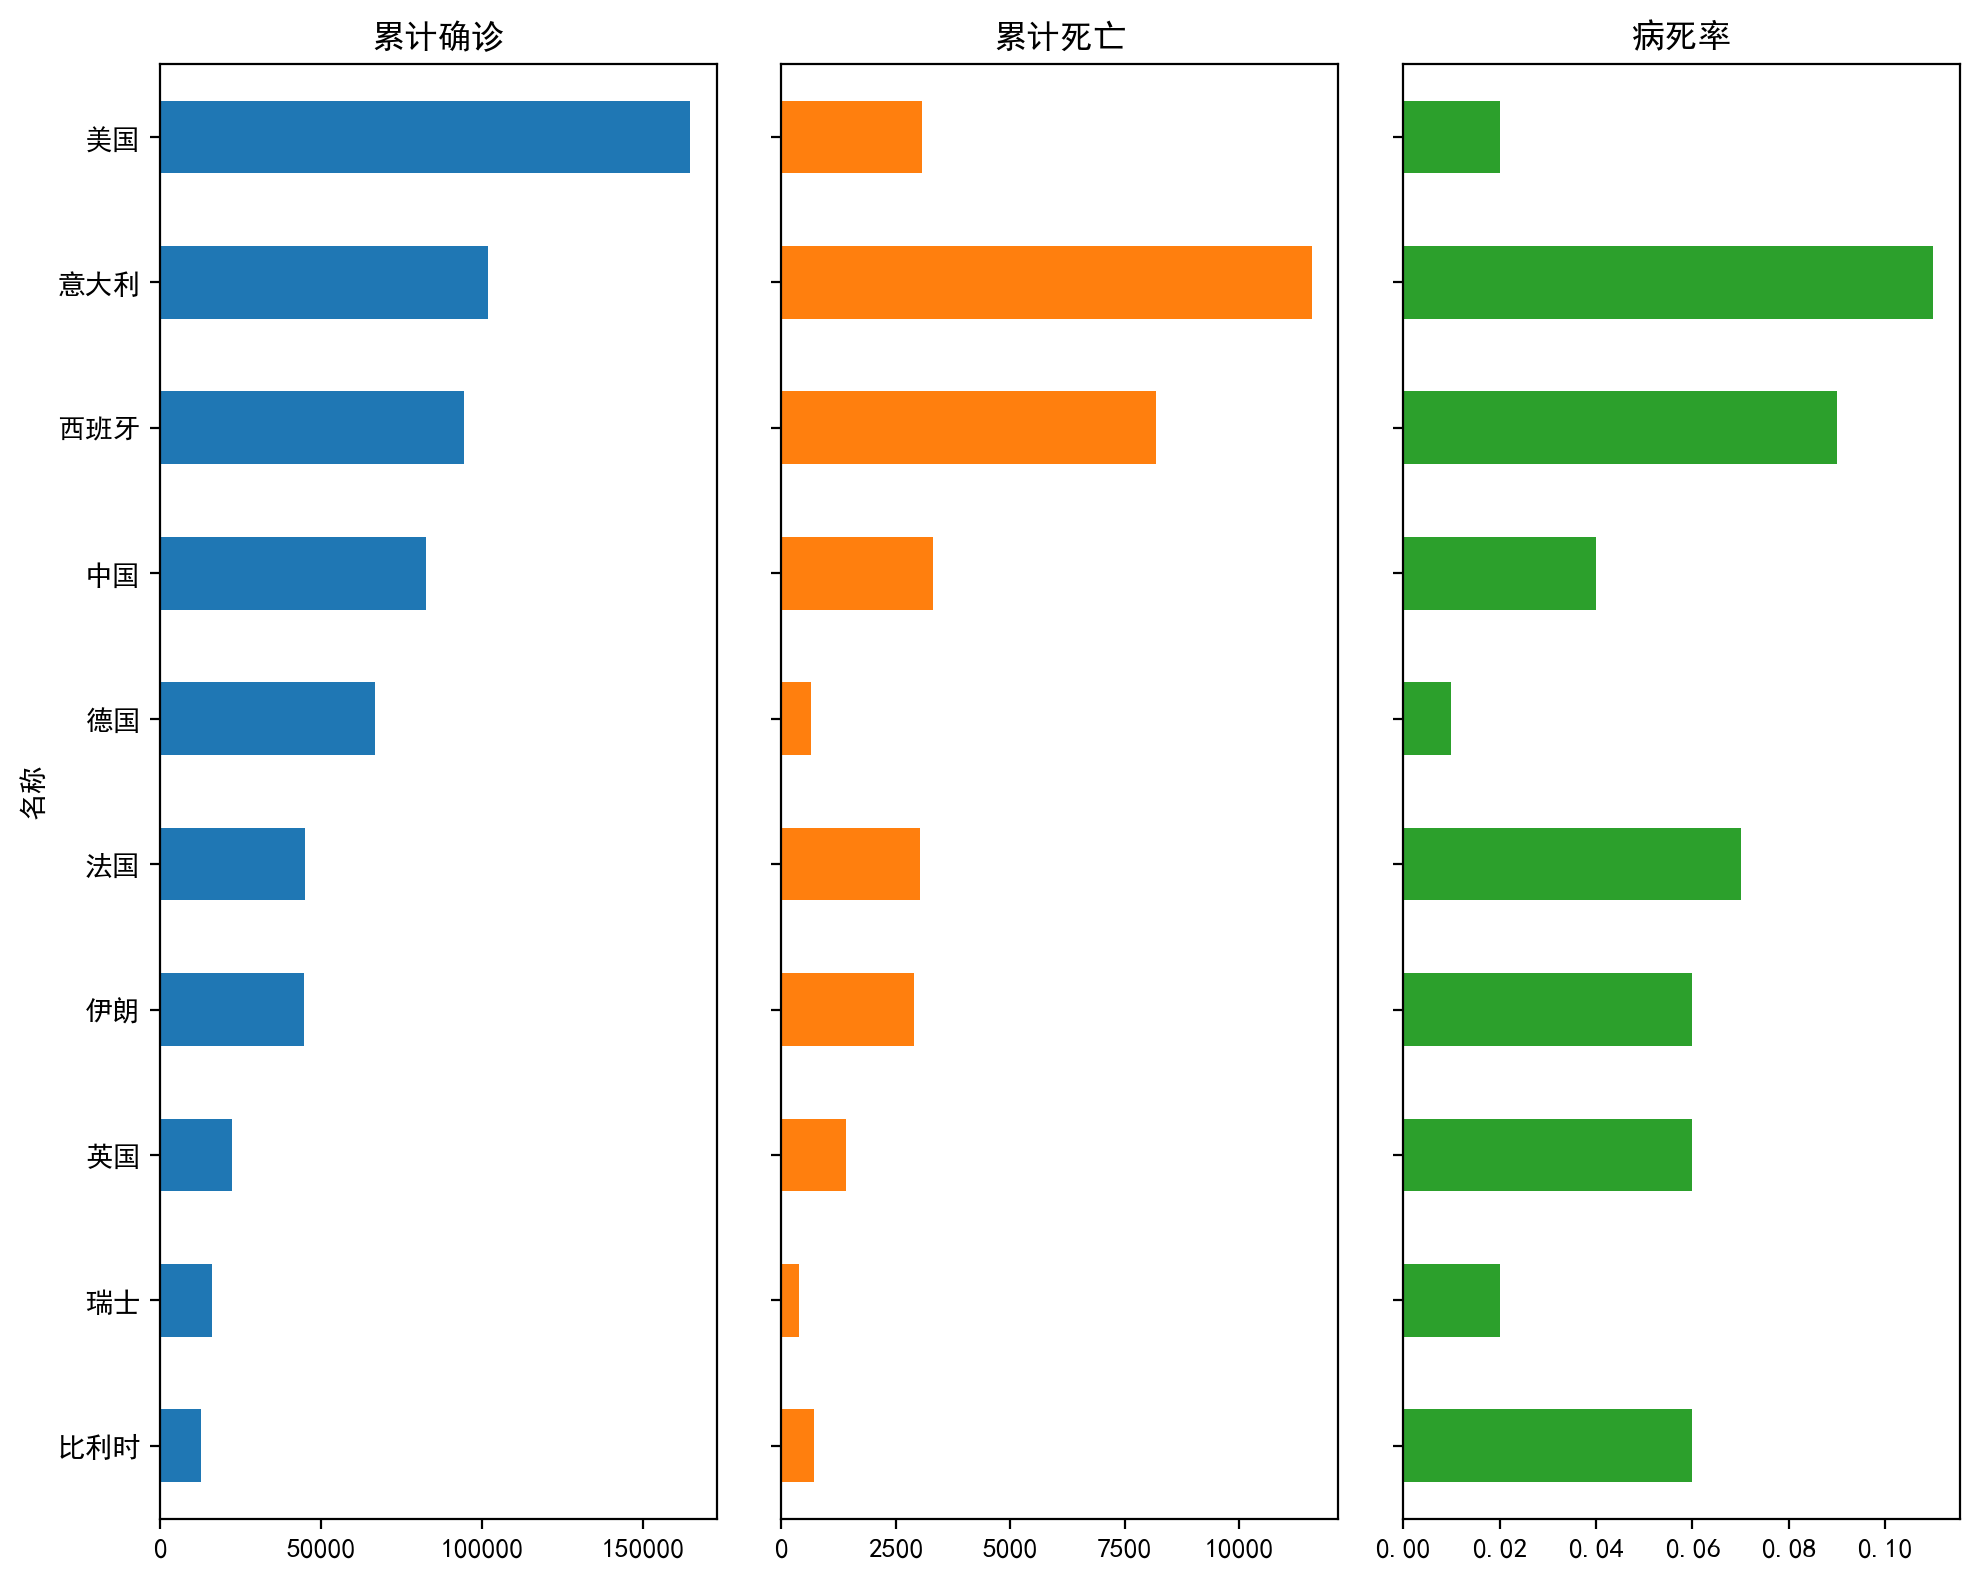

In [12]:
fig, ax = plt.subplots(figsize=(10,8),dpi=200)
w_10.sort_values('累计确诊').plot.barh(subplots=True,layout=(1,3),sharex=False,
                                             figsize=(7,4),legend=False,sharey=True,ax=ax)

plt.tight_layout()   
plt.show()

# 2.2

In [13]:
t_p = pd.read_csv("today_province_2020_03_31.csv")

name_dict = {'date':'日期','name':'名称','id':'编号','lastUpdateTime':'更新时间',
             'today_confirm':'当日新增确诊','today_suspect':'当日新增疑似',
             'today_heal':'当日新增治愈','today_dead':'当日新增死亡',
             'today_severe':'当日新增重症','today_storeConfirm':'当日现存确诊',
             'total_confirm':'累计确诊','total_suspect':'累计疑似',
             'total_heal':'累计治愈','total_dead':'累计死亡','total_severe':'累计重症'}

t_p.rename(columns=name_dict,inplace=True)    
t_p.head()

,编号,更新时间,名称,累计确诊,累计疑似,累计治愈,累计死亡,累计重症,当日新增确诊,当日新增疑似,当日新增治愈,当日新增死亡,当日新增重症,当日现存确诊
0,420000,2020-03-31 08:26:38,湖北,67801,0,63153,3187,0,0,NaN,271,1,NaN,NaN
1,440000,2020-03-31 17:49:10,广东,1494,0,1356,8,0,10,NaN,5,0,NaN,NaN
2,410000,2020-03-31 08:30:02,河南,1276,0,1251,22,0,0,NaN,0,0,NaN,NaN
3,330000,2020-03-31 09:06:29,浙江,1257,0,1226,1,0,2,NaN,1,0,NaN,NaN
4,430000,2020-03-31 08:27:03,湖南,1018,0,1014,4,0,0,NaN,0,0,NaN,NaN


In [14]:
t_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   编号      34 non-null     int64  
 1   更新时间    34 non-null     object 
 2   名称      34 non-null     object 
 3   累计确诊    34 non-null     int64  
 4   累计疑似    34 non-null     int64  
 5   累计治愈    34 non-null     int64  
 6   累计死亡    34 non-null     int64  
 7   累计重症    34 non-null     int64  
 8   当日新增确诊  34 non-null     int64  
 9   当日新增疑似  3 non-null      float64
 10  当日新增治愈  34 non-null     int64  
 11  当日新增死亡  34 non-null     int64  
 12  当日新增重症  3 non-null      float64
 13  当日现存确诊  0 non-null      float64
dtypes: float64(3), int64(9), object(2)
memory usage: 3.8+ KB


In [15]:
t_p.describe()

,编号,累计确诊,累计疑似,累计治愈,累计死亡,累计重症,当日新增确诊,当日新增疑似,当日新增治愈,当日新增死亡,当日新增重症,当日现存确诊
count,34.000000,34.000000,34.0,34.000000,34.000000,34.0,34.000000,3.0,34.000000,34.000000,3.0,0.0
mean,422941.176471,2429.382353,0.0,2242.264706,97.470588,0.0,4.441176,0.0,8.823529,0.088235,0.0,NaN
std,195021.823359,11557.886325,0.0,10769.927341,545.923418,0.0,13.089879,0.0,46.386042,0.378806,0.0,NaN
min,110000.000000,1.000000,0.0,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,NaN
25%,312500.000000,138.250000,0.0,124.250000,1.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,NaN
50%,425000.000000,321.500000,0.0,246.000000,3.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,NaN
75%,537500.000000,697.000000,0.0,615.750000,6.000000,0.0,2.750000,0.0,0.000000,0.000000,0.0,NaN
max,820000.000000,67801.000000,0.0,63153.000000,3187.000000,0.0,73.000000,0.0,271.000000,2.000000,0.0,NaN


In [16]:
# 当日现存确诊=累计确诊−累计治愈−累计死亡
t_p['当日现存确诊']=t_p['累计确诊']-t_p['累计治愈']-t_p['累计死亡']
t_p.set_index('名称',inplace=True)
t_p.head()

,编号,更新时间,累计确诊,累计疑似,累计治愈,累计死亡,累计重症,当日新增确诊,当日新增疑似,当日新增治愈,当日新增死亡,当日新增重症,当日现存确诊
名称,,,,,,,,,,,,,
湖北,420000,2020-03-31 08:26:38,67801,0,63153,3187,0,0,NaN,271,1,NaN,1461
广东,440000,2020-03-31 17:49:10,1494,0,1356,8,0,10,NaN,5,0,NaN,130
河南,410000,2020-03-31 08:30:02,1276,0,1251,22,0,0,NaN,0,0,NaN,3
浙江,330000,2020-03-31 09:06:29,1257,0,1226,1,0,2,NaN,1,0,NaN,30
湖南,430000,2020-03-31 08:27:03,1018,0,1014,4,0,0,NaN,0,0,NaN,0


In [17]:
n_10=t_p['当日新增确诊'].sort_values(ascending=False)[:10]
n_10

名称
香港     73
台湾     24
上海     11
广东     10
内蒙古    10
天津      8
福建      3
北京      3
辽宁      3
浙江      2
Name: 当日新增确诊, dtype: int64

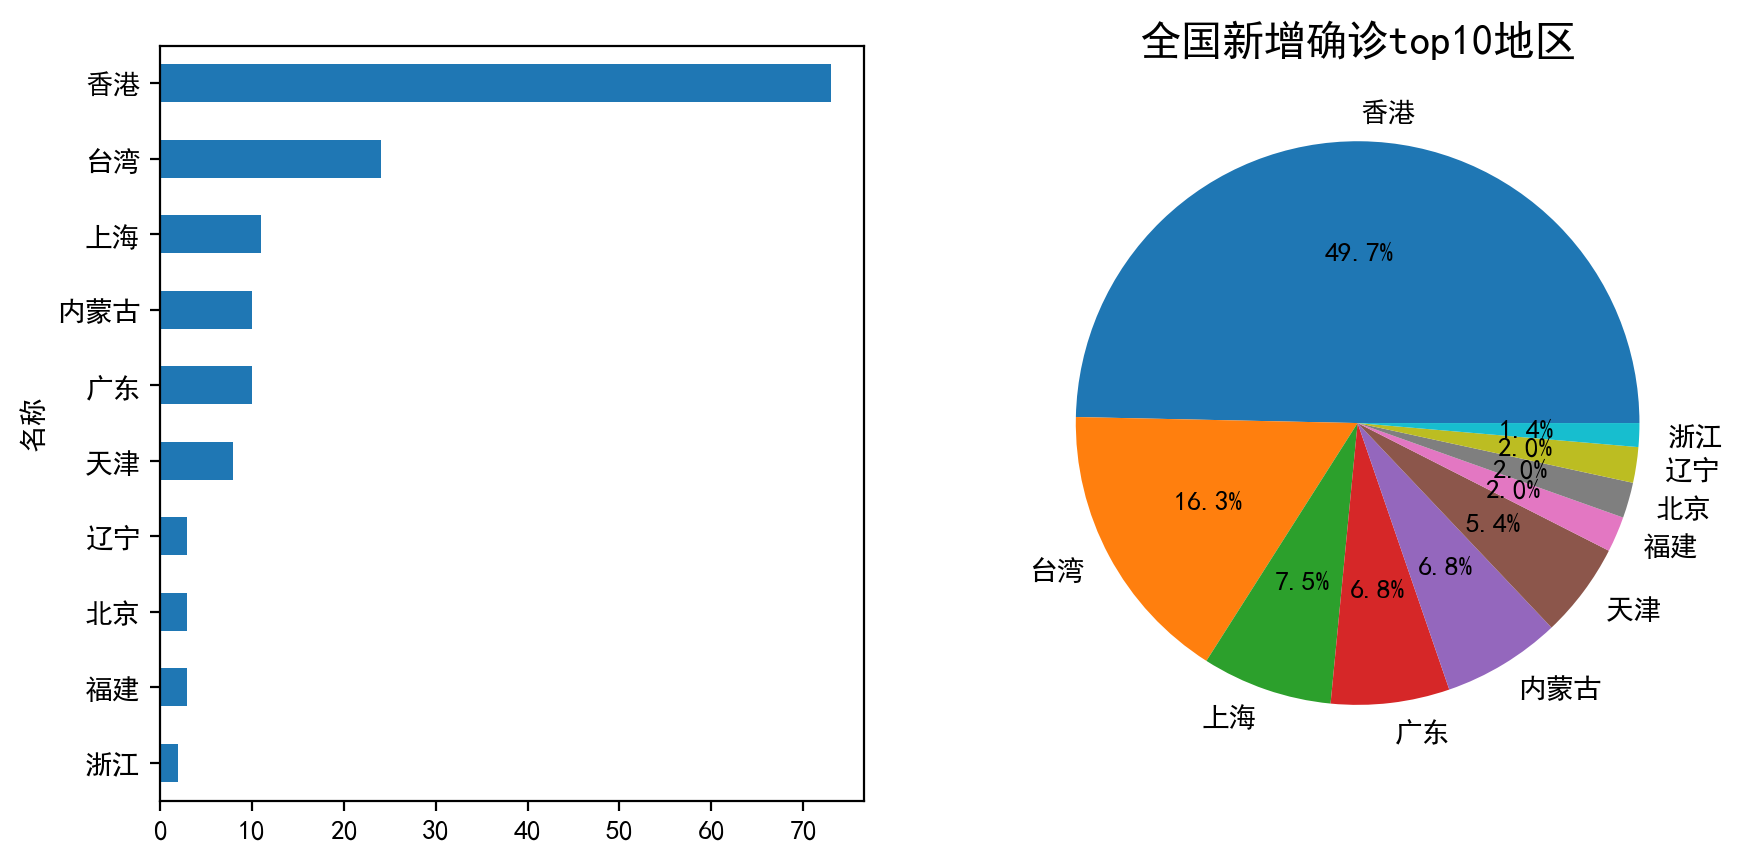

In [18]:
fig,ax = plt.subplots(1,2,figsize=(10,5),dpi=200)
n_10.sort_values(ascending=True).plot.barh(ax=ax[0])
n_10.plot.pie(subplots=True,autopct='%.1f%%',fontsize=10,ax=ax[1])
plt.ylabel('')
plt.title('全国新增确诊top10地区',size=15)
plt.show()

In [19]:
s_10=t_p['当日现存确诊'].sort_values(ascending=False)[:10]
s_10

名称
湖北     1461
香港      582
台湾      278
上海      163
北京      154
广东      130
福建       47
天津       38
内蒙古      32
浙江       30
Name: 当日现存确诊, dtype: int64

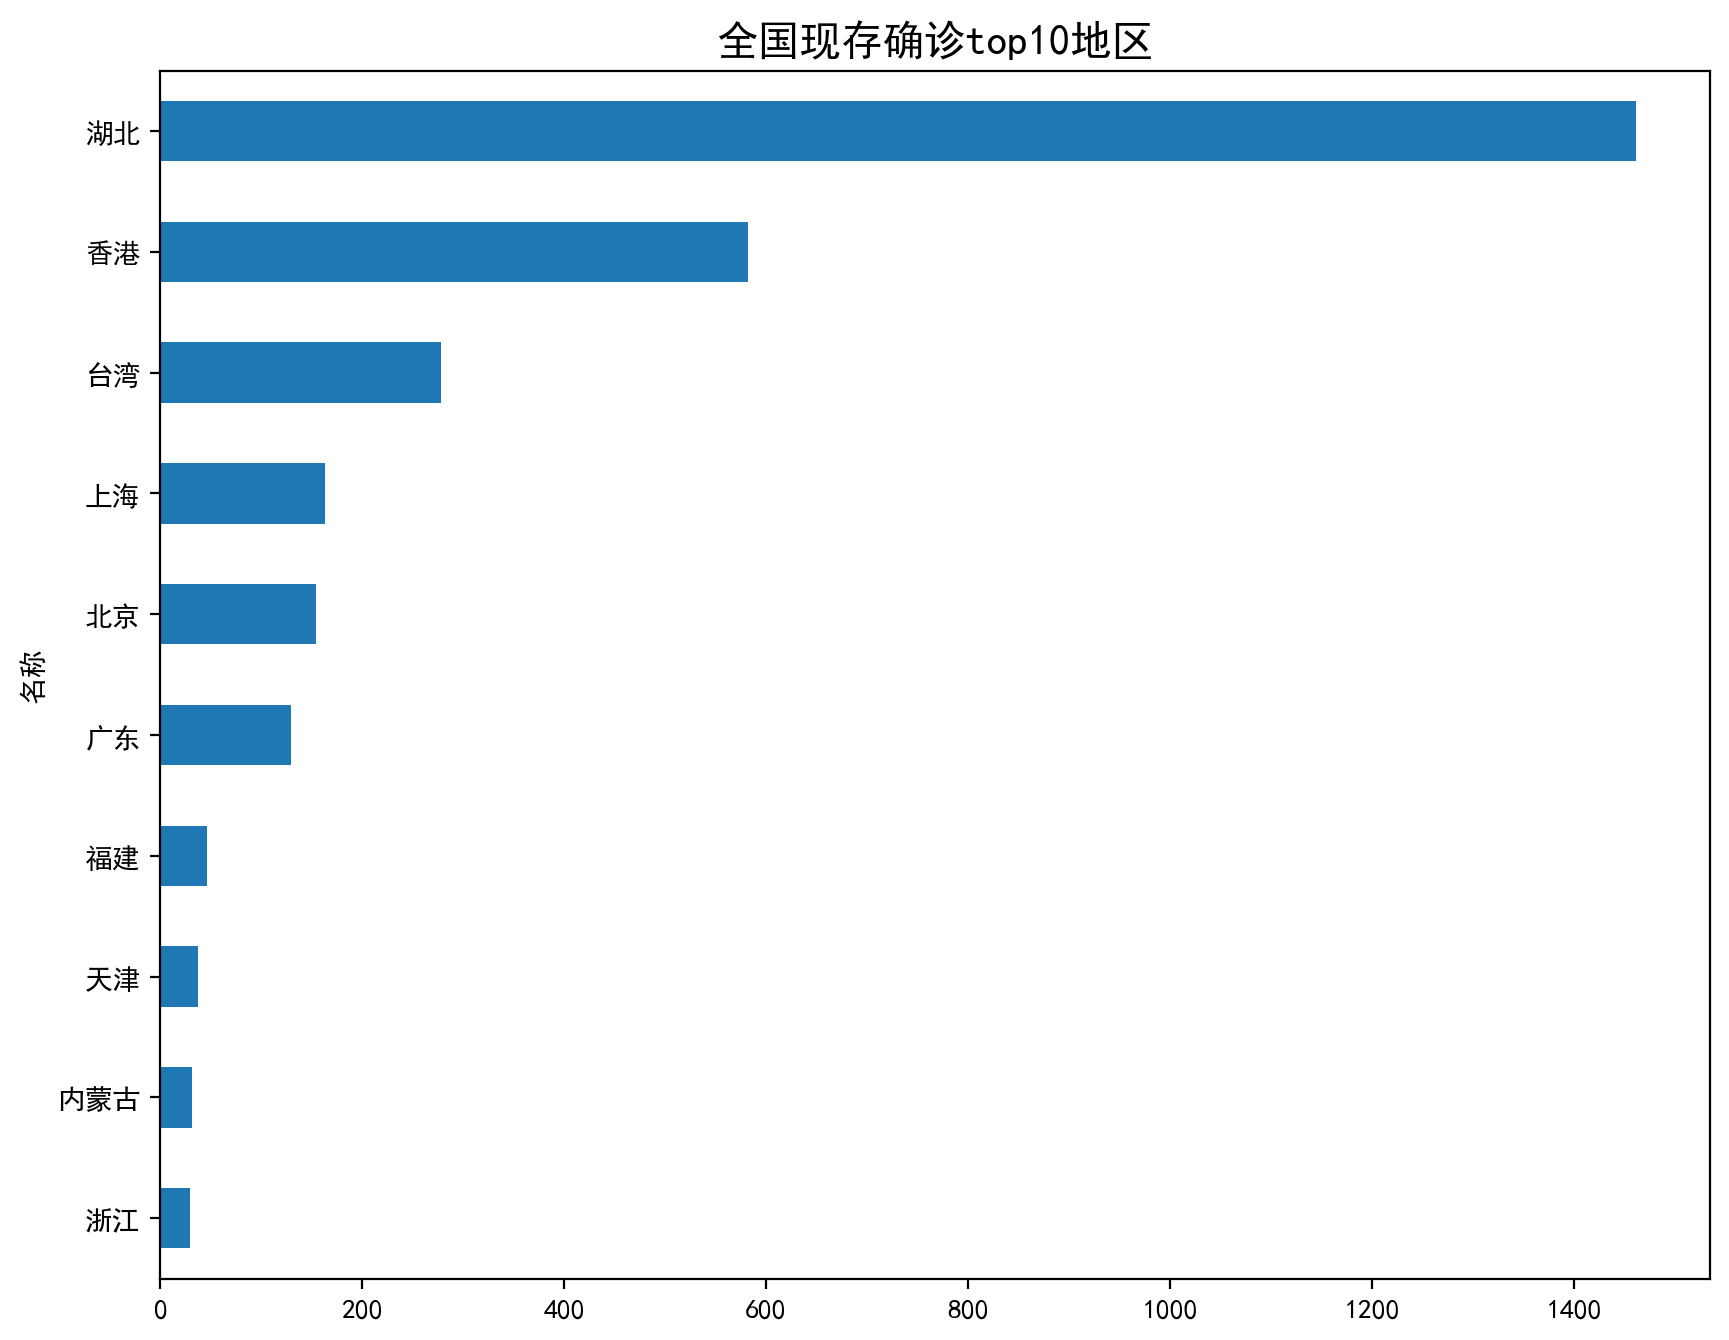

In [20]:
fig, ax = plt.subplots(figsize=(10,8),dpi=200)
s_10.sort_values(ascending=True).plot.barh(fontsize=10,ax=ax)
plt.title('全国现存确诊top10地区',size=15)
plt.show()

# 3.1

In [21]:
a_c = pd.read_csv("alltime_China_2020_03_31.csv")
name_dict = {'date':'日期','name':'名称','id':'编号','lastUpdateTime':'更新时间',
             'today_confirm':'当日新增确诊','today_suspect':'当日新增疑似',
             'today_heal':'当日新增治愈','today_dead':'当日新增死亡',
             'today_severe':'当日新增重症','today_storeConfirm':'当日现存确诊',
             'total_confirm':'累计确诊','total_suspect':'累计疑似',
             'total_heal':'累计治愈','total_dead':'累计死亡','total_severe':'累计重症'}
a_c.rename(columns=name_dict,inplace=True)
a_c.head()

,日期,更新时间,累计确诊,累计疑似,累计治愈,累计死亡,累计重症,当日新增确诊,当日新增疑似,当日新增治愈,当日新增死亡,当日新增重症,当日现存确诊
0,2020-01-20,NaN,291,54,25,6,0,291,27,25,6,0,NaN
1,2020-01-21,NaN,440,37,25,9,102,149,26,0,3,0,NaN
2,2020-01-22,NaN,571,393,28,17,95,131,257,3,8,0,NaN
3,2020-01-23,NaN,830,1072,34,25,177,259,680,6,8,0,NaN
4,2020-01-24,NaN,1287,1965,38,41,237,457,1118,4,16,0,NaN


In [22]:
a_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   日期      71 non-null     object 
 1   更新时间    0 non-null      float64
 2   累计确诊    71 non-null     int64  
 3   累计疑似    71 non-null     int64  
 4   累计治愈    71 non-null     int64  
 5   累计死亡    71 non-null     int64  
 6   累计重症    71 non-null     int64  
 7   当日新增确诊  71 non-null     int64  
 8   当日新增疑似  71 non-null     int64  
 9   当日新增治愈  71 non-null     int64  
 10  当日新增死亡  71 non-null     int64  
 11  当日新增重症  71 non-null     int64  
 12  当日现存确诊  0 non-null      float64
dtypes: float64(2), int64(10), object(1)
memory usage: 7.3+ KB


In [23]:
a_c.describe()

,更新时间,累计确诊,累计疑似,累计治愈,累计死亡,累计重症,当日新增确诊,当日新增疑似,当日新增治愈,当日新增死亡,当日新增重症,当日现存确诊
count,0.0,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.0,0.0
mean,NaN,58272.267606,6094.830986,33245.281690,2025.056338,4796.183099,1148.140845,1378.154930,1071.154930,46.549296,0.0,NaN
std,NaN,30572.980946,8497.722887,29864.644742,1264.722329,3724.337603,1985.171351,1749.404925,930.775616,43.866612,0.0,NaN
min,NaN,291.000000,37.000000,25.000000,6.000000,0.000000,11.000000,17.000000,0.000000,1.000000,0.0,NaN
25%,NaN,32853.500000,178.500000,1795.000000,679.000000,1550.000000,46.500000,42.500000,302.000000,9.500000,0.0,NaN
50%,NaN,77658.000000,1418.000000,27323.000000,2663.000000,4020.000000,397.000000,439.000000,819.000000,30.000000,0.0,NaN
75%,NaN,80818.500000,8598.500000,64826.000000,3182.500000,7514.500000,1934.500000,2363.500000,1679.500000,73.000000,0.0,NaN
max,NaN,81518.000000,28942.000000,76052.000000,3305.000000,11977.000000,14108.000000,5328.000000,3622.000000,150.000000,0.0,NaN


In [24]:
# 当日现存确诊=累计确诊−累计治愈−累计死亡
a_c['当日现存确诊']=a_c['累计确诊']-a_c['累计治愈']-a_c['累计死亡']
a_c.drop(['更新时间','当日新增重症'],axis=1,inplace=True)
a_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   日期      71 non-null     object
 1   累计确诊    71 non-null     int64 
 2   累计疑似    71 non-null     int64 
 3   累计治愈    71 non-null     int64 
 4   累计死亡    71 non-null     int64 
 5   累计重症    71 non-null     int64 
 6   当日新增确诊  71 non-null     int64 
 7   当日新增疑似  71 non-null     int64 
 8   当日新增治愈  71 non-null     int64 
 9   当日新增死亡  71 non-null     int64 
 10  当日现存确诊  71 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 6.2+ KB


In [25]:
a_c['日期']=pd.to_datetime(a_c['日期'])
a_c.set_index('日期',inplace=True)
a_c.index

DatetimeIndex(['2020-01-20', '2020-01-21', '2020-01-22', '2020-01-23',
               '2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
               '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
               '2020-02-01', '2020-02-02', '2020-02-03', '2020-02-04',
               '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08',
               '2020-02-09', '2020-02-10', '2020-02-11', '2020-02-12',
               '2020-02-13', '2020-02-14', '2020-02-15', '2020-02-16',
               '2020-02-17', '2020-02-18', '2020-02-19', '2020-02-20',
               '2020-02-21', '2020-02-22', '2020-02-23', '2020-02-24',
               '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28',
               '2020-02-29', '2020-03-01', '2020-03-02', '2020-03-03',
               '2020-03-04', '2020-03-05', '2020-03-06', '2020-03-07',
               '2020-03-08', '2020-03-09', '2020-03-10', '2020-03-11',
               '2020-03-12', '2020-03-13', '2020-03-14', '2020-03-15',
      

In [26]:
a_c.loc['2020-02']

,累计确诊,累计疑似,累计治愈,累计死亡,累计重症,当日新增确诊,当日新增疑似,当日新增治愈,当日新增死亡,当日现存确诊
日期,,,,,,,,,,
2020-02-01,14380,19544,328,304,2110,2589,4562,85,45,13748
2020-02-02,17205,21558,475,361,2296,2825,5173,147,57,16369
2020-02-03,20438,23214,632,425,2788,3233,5072,157,64,19381
2020-02-04,24324,23260,892,490,3219,3886,3971,260,65,22942
2020-02-05,28018,24702,1153,563,3859,3694,5328,261,73,26302
2020-02-06,31161,26359,1540,636,4821,3143,4833,387,73,28985
2020-02-07,34546,27657,2050,722,6101,3385,4214,510,86,31774
2020-02-08,37198,28942,2649,811,6188,2652,3916,599,89,33738
2020-02-09,40171,23589,3281,908,6484,2973,4008,632,97,35982


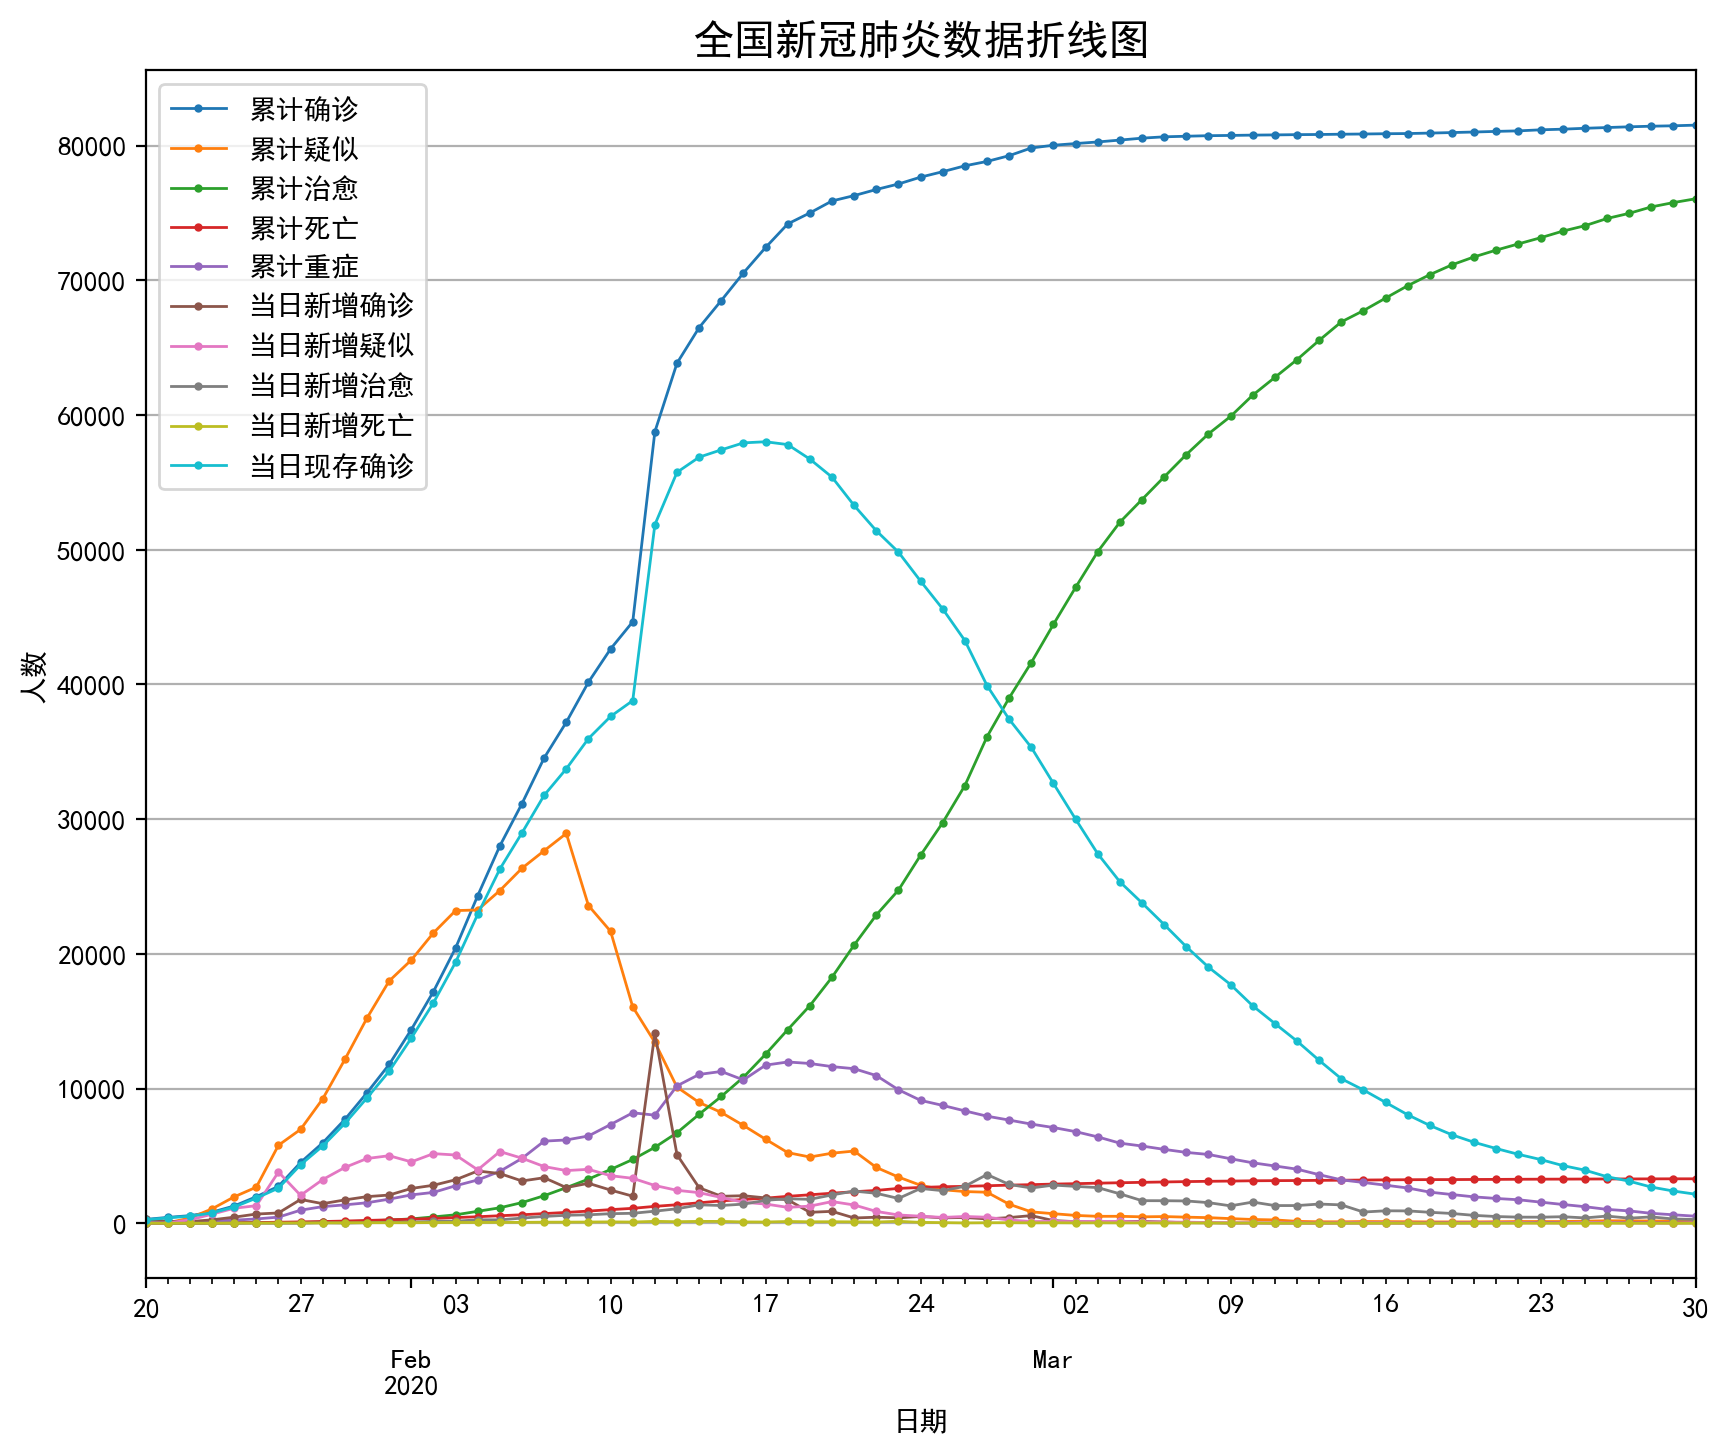

In [27]:
fig, ax = plt.subplots(figsize=(10,8),dpi=200)
a_c.plot(marker='o',ms=2,lw=1,ax=ax)
plt.title('全国新冠肺炎数据折线图',size=15)
plt.ylabel('人数')
plt.grid(axis='y')

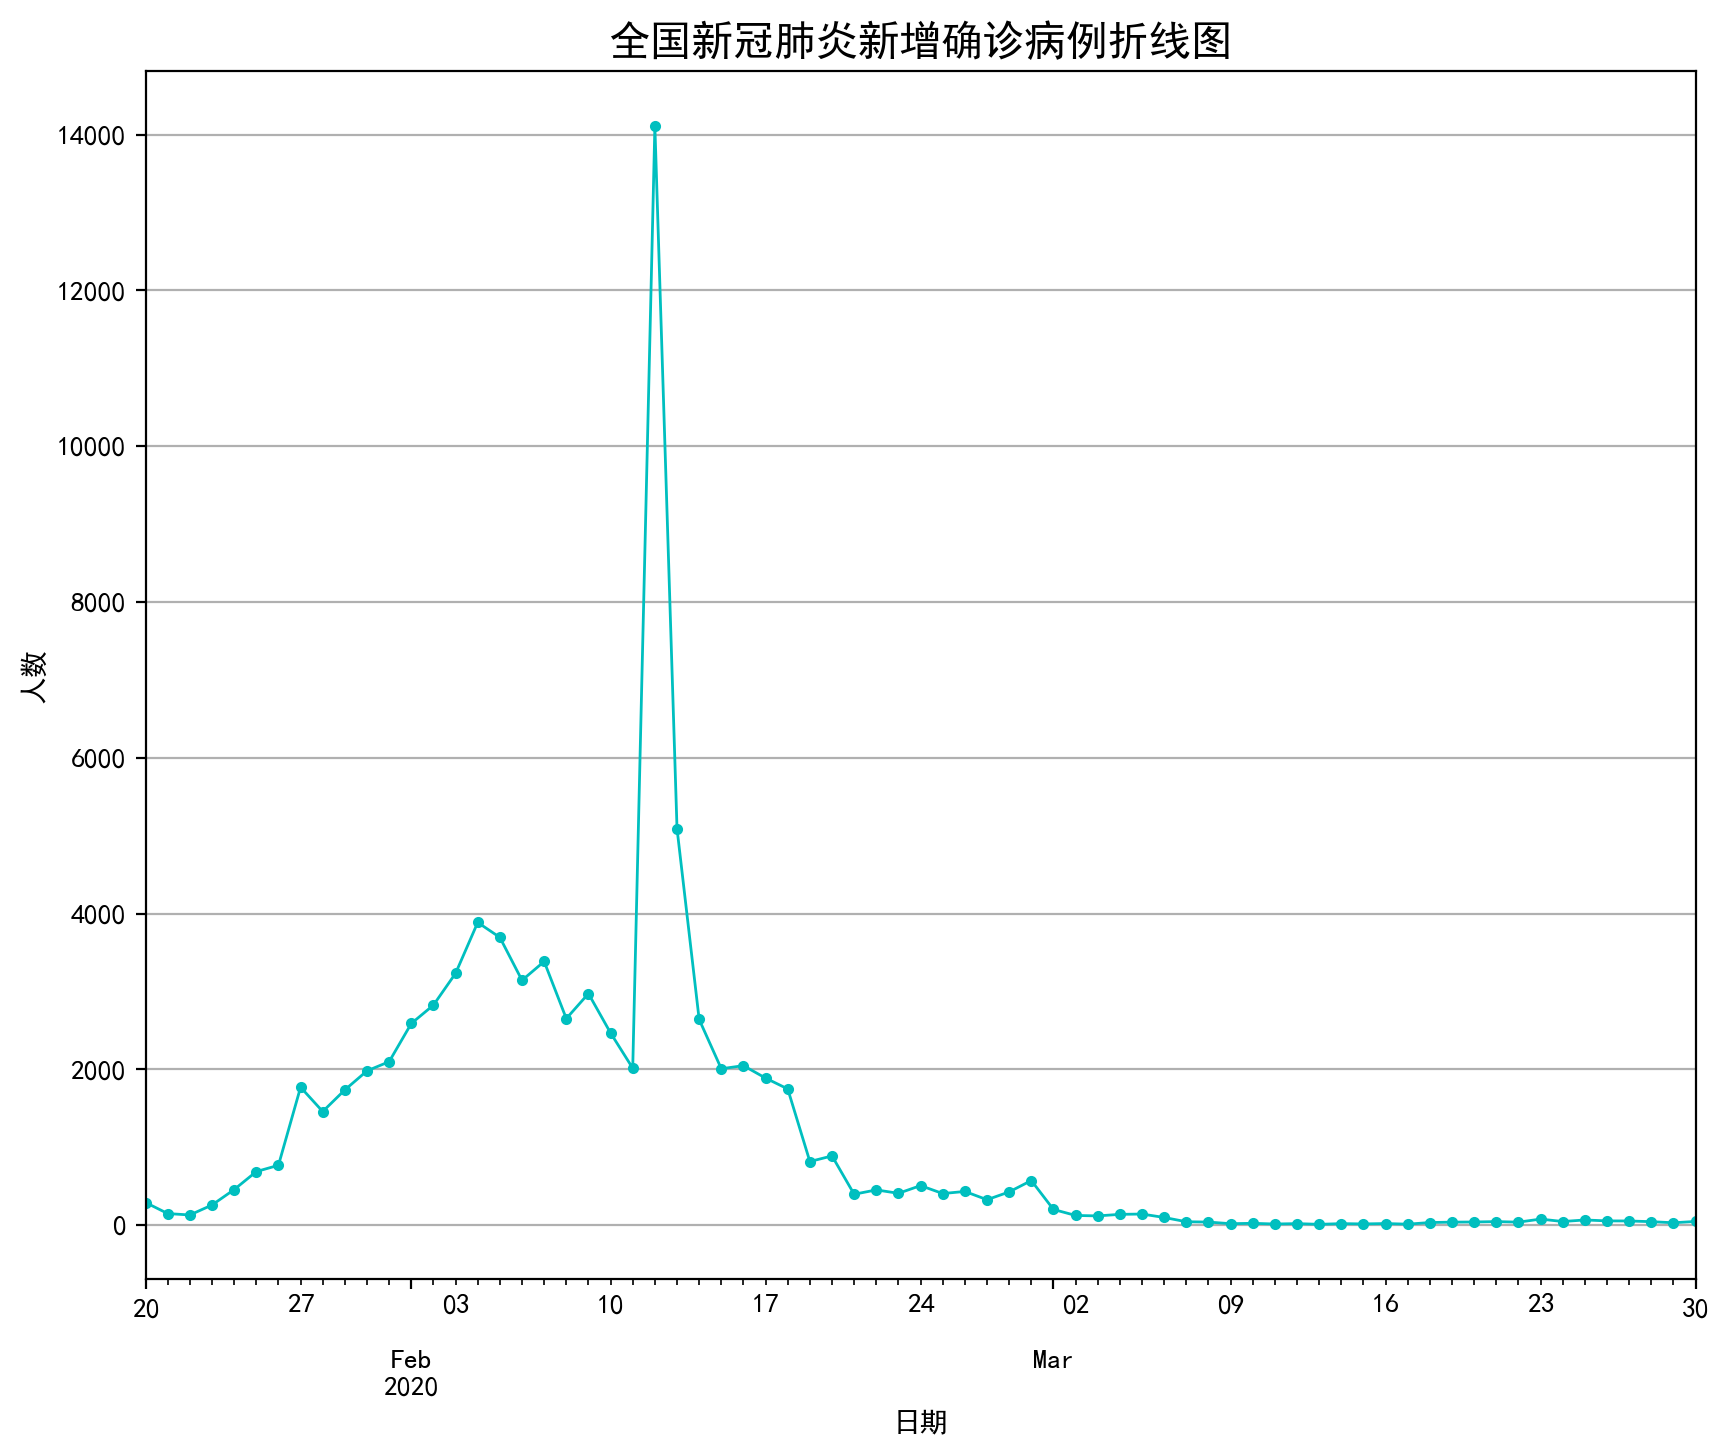

In [28]:
fig, ax = plt.subplots(figsize=(10,8),dpi=200)
a_c['当日新增确诊'].plot(marker='o',style='-',lw=1,color='c',ms=3)
plt.title('全国新冠肺炎新增确诊病例折线图',size=15)
plt.ylabel('人数')
plt.grid(axis='y')

# 3.2

In [29]:
alltime_world = pd.read_csv("alltime_world_2020_03_31.csv")
name_dict = {'date':'日期','name':'名称','id':'编号','lastUpdateTime':'更新时间',
             'today_confirm':'当日新增确诊','today_suspect':'当日新增疑似',
             'today_heal':'当日新增治愈','today_dead':'当日新增死亡',
             'today_severe':'当日新增重症','today_storeConfirm':'当日现存确诊',
             'total_confirm':'累计确诊','total_suspect':'累计疑似',
             'total_heal':'累计治愈','total_dead':'累计死亡','total_severe':'累计重症'}
alltime_world.rename(columns=name_dict,inplace=True)
alltime_world.head()

,日期,累计确诊,累计疑似,累计治愈,累计死亡,累计重症,当日新增确诊,当日新增疑似,当日新增治愈,当日新增死亡,当日新增重症,当日现存确诊,名称
0,2020-03-03,1,0,0,0,0,1,0.0,0,0,NaN,NaN,突尼斯
1,2020-03-08,2,0,0,0,0,1,0.0,0,0,0.0,NaN,突尼斯
2,2020-03-09,5,0,0,0,0,3,0.0,0,0,0.0,NaN,突尼斯
3,2020-03-11,7,0,0,0,0,2,0.0,0,0,0.0,NaN,突尼斯
4,2020-03-12,13,0,0,0,0,6,0.0,0,0,0.0,NaN,突尼斯


In [30]:
alltime_world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3048 entries, 0 to 3047
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   日期      3048 non-null   object 
 1   累计确诊    3048 non-null   int64  
 2   累计疑似    3048 non-null   int64  
 3   累计治愈    3048 non-null   int64  
 4   累计死亡    3048 non-null   int64  
 5   累计重症    3048 non-null   int64  
 6   当日新增确诊  3048 non-null   int64  
 7   当日新增疑似  2912 non-null   float64
 8   当日新增治愈  3048 non-null   int64  
 9   当日新增死亡  3048 non-null   int64  
 10  当日新增重症  2512 non-null   float64
 11  当日现存确诊  0 non-null      float64
 12  名称      3048 non-null   object 
dtypes: float64(3), int64(8), object(2)
memory usage: 309.7+ KB


In [31]:
alltime_world.describe()

,累计确诊,累计疑似,累计治愈,累计死亡,累计重症,当日新增确诊,当日新增疑似,当日新增治愈,当日新增死亡,当日新增重症,当日现存确诊
count,3048.000000,3048.000000,3048.000000,3048.000000,3048.000000,3048.000000,2912.000000,3048.000000,3048.000000,2512.000000,0.0
mean,3275.215879,89.309055,1006.174541,132.135499,35.017388,262.135499,15.595467,55.206693,12.646982,-2.882564,NaN
std,13482.084538,1253.684029,6980.113868,698.118983,403.228076,1290.621505,201.004634,306.368872,73.263761,27.524887,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-464.000000,NaN
25%,16.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,90.000000,0.000000,1.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,554.500000,0.000000,16.000000,6.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,NaN
max,164603.000000,28942.000000,76237.000000,11591.000000,7365.000000,26154.000000,4008.000000,5352.000000,1386.000000,0.000000,NaN


In [32]:
alltime_world['日期'] = pd.to_datetime(alltime_world['日期'])
alltime_world['当日现存确诊'] = alltime_world['累计确诊']-alltime_world['累计治愈']-alltime_world['累计死亡']
alltime_world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3048 entries, 0 to 3047
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   日期      3048 non-null   datetime64[ns]
 1   累计确诊    3048 non-null   int64         
 2   累计疑似    3048 non-null   int64         
 3   累计治愈    3048 non-null   int64         
 4   累计死亡    3048 non-null   int64         
 5   累计重症    3048 non-null   int64         
 6   当日新增确诊  3048 non-null   int64         
 7   当日新增疑似  2912 non-null   float64       
 8   当日新增治愈  3048 non-null   int64         
 9   当日新增死亡  3048 non-null   int64         
 10  当日新增重症  2512 non-null   float64       
 11  当日现存确诊  3048 non-null   int64         
 12  名称      3048 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(9), object(1)
memory usage: 309.7+ KB


In [33]:
alltime_world['名称'].unique()

array(['突尼斯', '塞尔维亚', '中国', '日本', '泰国', '新加坡', '韩国', '澳大利亚', '德国', '美国',
       '马来西亚', '越南', '圣巴泰勒米', '肯尼亚', '伊朗', '以色列', '黎巴嫩', '克罗地亚', '奥地利',
       '瑞士', '希腊', '毛里求斯', '爱沙尼亚', '北马其顿', '白俄罗斯', '立陶宛', '阿塞拜疆',
       '美属维尔京群岛', '蒙古', '乌克兰', '波兰', '波斯尼亚', '波黑', '蒙特塞拉特', '南非', '马耳他',
       '摩尔多瓦', '保加利亚', '孟加拉国', '阿尔巴尼亚', '巴勒斯坦', '阿富汗', '沙特阿拉伯', '新西兰',
       '泽西岛', '叙利亚', '巴拿马', '古巴', '尼日利亚', '摩洛哥', '塞内加尔', '老挝', '巴哈马',
       '马约特岛', '萨尔多瓦', '斯洛文尼亚', '卢森堡', '爱尔兰', '厄瓜多尔', '捷克', '匈牙利',
       '法属圭亚那', '多哥共和国', '哥斯达黎加', '文莱', '荷兰', '巴西', '洪都拉斯', '乌拉圭', '秘鲁',
       '智利', '格陵兰', '圣巴托洛谬岛', '马尔代夫', '委内瑞拉', '毛里塔尼亚', '纳米比亚', '法属留尼汪岛',
       '波多黎各', '加纳', '赤道几内亚', '几内亚', '卢旺达', '格林纳达', '斯威士兰', '坦桑尼亚', '贝宁',
       '刚果（金）', '中非共和国', '利比里亚', '索马里', '乍得', '赞比亚', '巴巴多斯', '马里', '阿根廷',
       '法属波利尼西亚', '巴林', '莫桑比克', '喀麦隆', '乌干达', '厄立特里亚', '刚果（布）', '津巴布韦',
       '丹麦', '阿鲁巴', '斐济', '伯利兹', '缅甸', '塞浦路斯', '关岛', '科索沃', '吉尔吉斯斯坦',
       '博茨瓦纳', '尼日尔', '苏里南', '佛得角', '萨尔瓦多', '圭亚那', '尼加拉瓜', '冈比亚', '东帝汶',

In [34]:
alltime_world['日期'].value_counts().head(20)

2020-03-26    157
2020-03-27    130
2020-03-22    129
2020-03-25    125
2020-03-28    120
2020-03-24    118
2020-03-23    116
2020-03-14    113
2020-03-29    110
2020-03-19    109
2020-03-20    106
2020-03-13    105
2020-03-15    102
2020-03-30     97
2020-03-21     96
2020-03-16     94
2020-03-18     94
2020-03-17     86
2020-03-10     73
2020-03-11     71
Name: 日期, dtype: int64

In [35]:
alltime_world.set_index('日期',inplace=True)
alltime_world = alltime_world.loc[:'2020-03-31']

In [36]:
data = alltime_world.groupby(['日期','名称']).mean()
data.head()

,,累计确诊,累计疑似,累计治愈,累计死亡,累计重症,当日新增确诊,当日新增疑似,当日新增治愈,当日新增死亡,当日新增重症,当日现存确诊
日期,名称,,,,,,,,,,,
2020-01-20,韩国,1,0,0,0,0,1,0.0,0,0,NaN,1
2020-01-21,韩国,1,0,0,0,0,0,0.0,0,0,NaN,1
2020-01-22,韩国,1,0,0,0,0,0,0.0,0,0,NaN,1
2020-01-23,韩国,1,0,0,0,0,0,0.0,0,0,NaN,1
2020-01-24,韩国,2,0,0,0,0,1,0.0,0,0,NaN,2


In [37]:
data.loc

In [38]:
data_part = data.loc(axis=0)[:,['中国','日本','韩国','美国','意大利','英国','西班牙','德国']]
data_part.head()

,,累计确诊,累计疑似,累计治愈,累计死亡,累计重症,当日新增确诊,当日新增疑似,当日新增治愈,当日新增死亡,当日新增重症,当日现存确诊
日期,名称,,,,,,,,,,,
2020-01-20,韩国,1,0,0,0,0,1,0.0,0,0,NaN,1
2020-01-21,韩国,1,0,0,0,0,0,0.0,0,0,NaN,1
2020-01-22,韩国,1,0,0,0,0,0,0.0,0,0,NaN,1
2020-01-23,韩国,1,0,0,0,0,0,0.0,0,0,NaN,1
2020-01-24,韩国,2,0,0,0,0,1,0.0,0,0,NaN,2


In [39]:
data_part.reset_index('名称',inplace=True)
data_part.head()

,名称,累计确诊,累计疑似,累计治愈,累计死亡,累计重症,当日新增确诊,当日新增疑似,当日新增治愈,当日新增死亡,当日新增重症,当日现存确诊
日期,,,,,,,,,,,,
2020-01-20,韩国,1,0,0,0,0,1,0.0,0,0,NaN,1
2020-01-21,韩国,1,0,0,0,0,0,0.0,0,0,NaN,1
2020-01-22,韩国,1,0,0,0,0,0,0.0,0,0,NaN,1
2020-01-23,韩国,1,0,0,0,0,0,0.0,0,0,NaN,1
2020-01-24,韩国,2,0,0,0,0,1,0.0,0,0,NaN,2


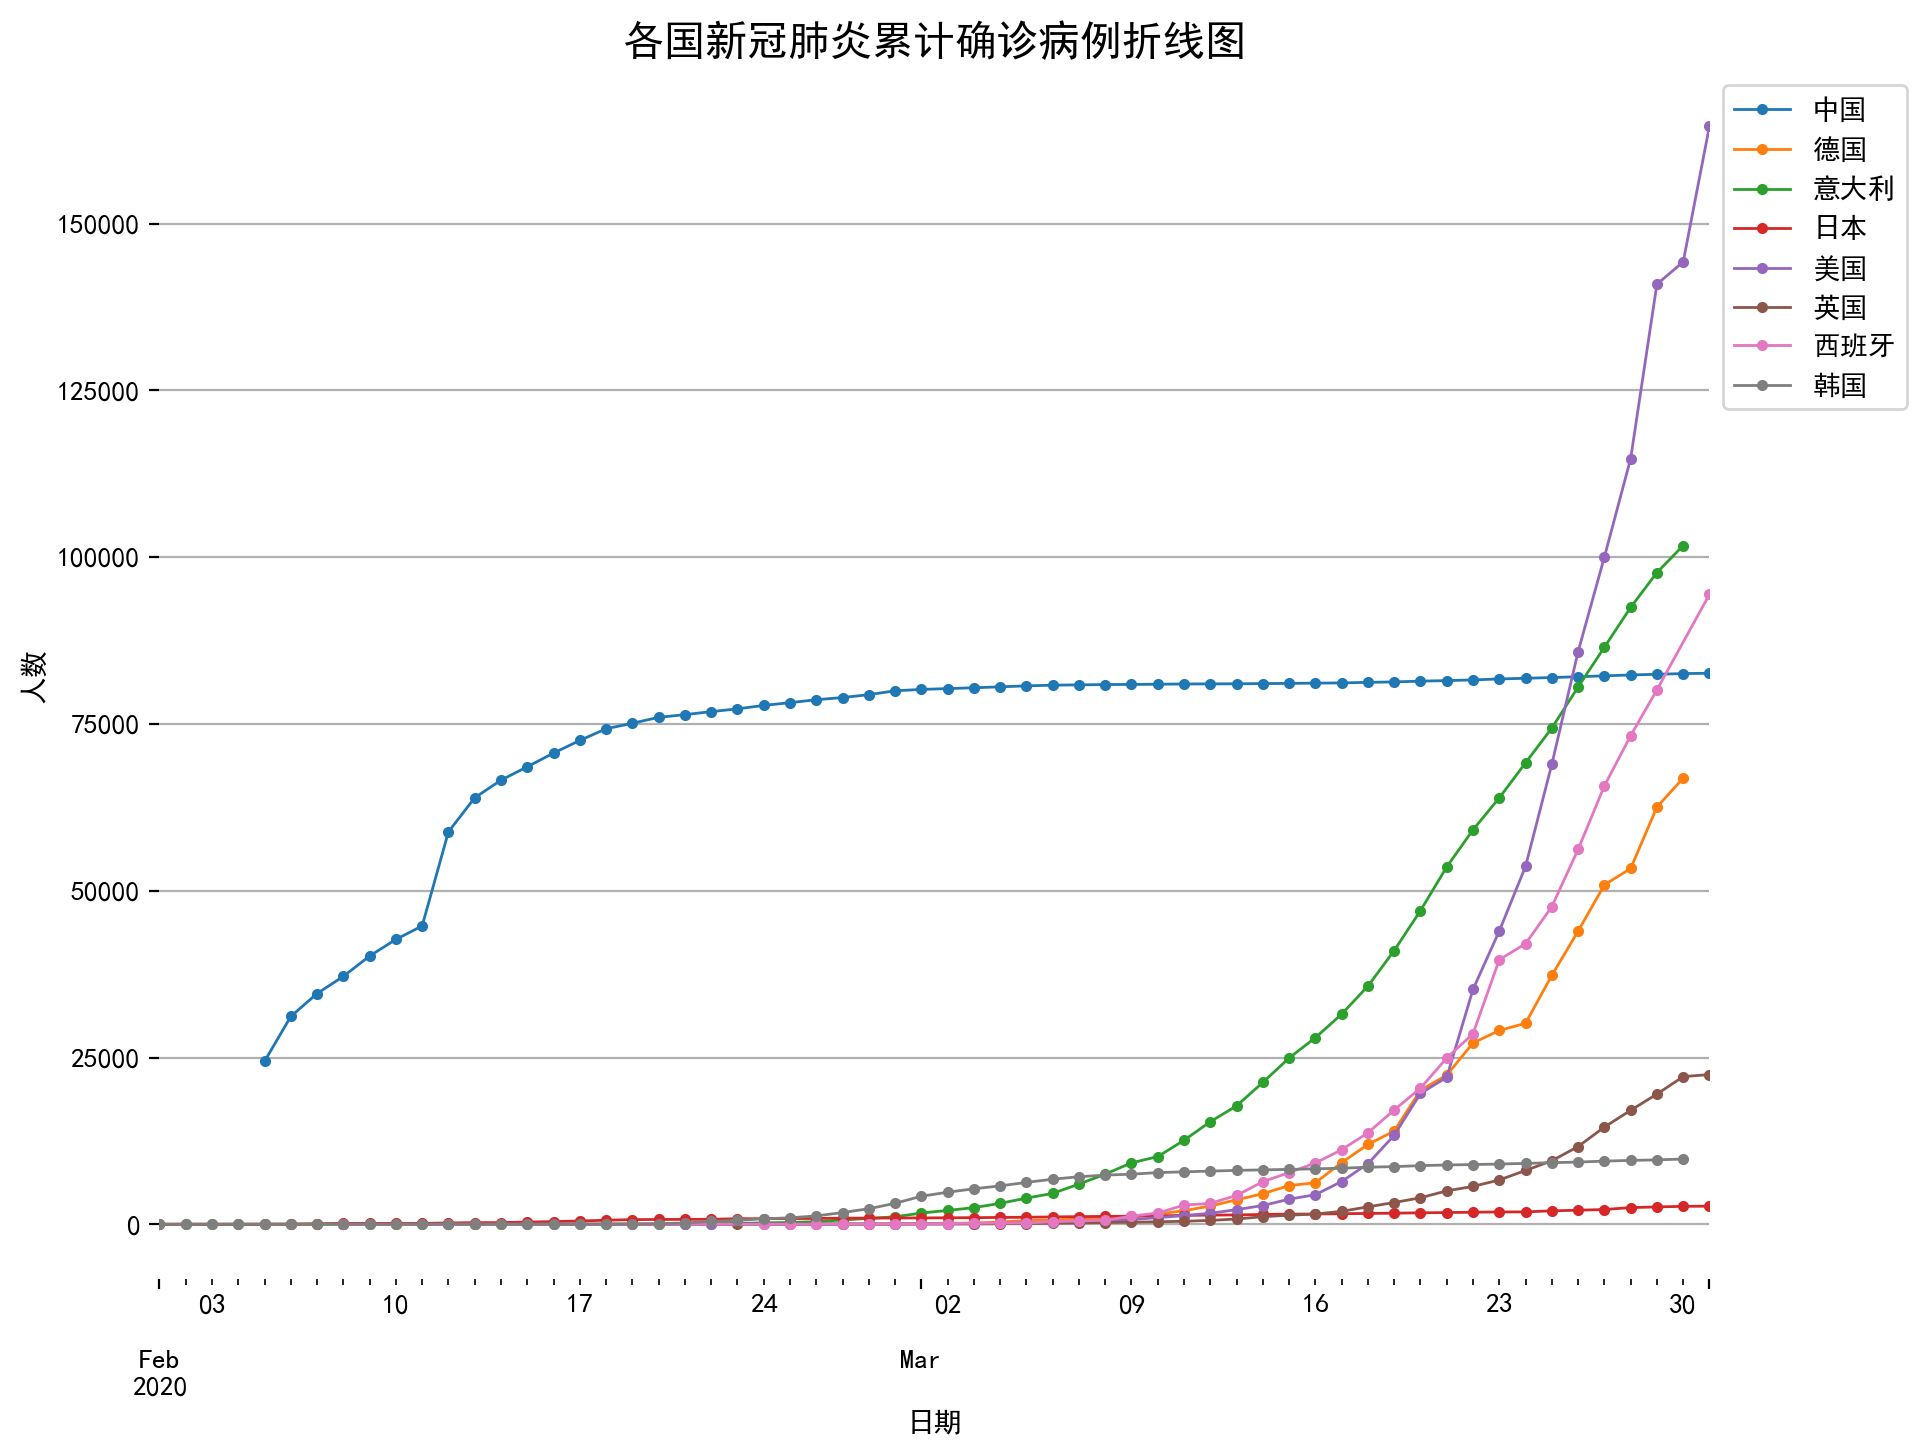

In [40]:
fig, ax = plt.subplots(figsize=(10,8),dpi=200)
data_part['2020-02':].groupby('名称')['累计确诊'].plot(legend=True,marker='o',ms=3,lw=1)
plt.title('各国新冠肺炎累计确诊病例折线图',size=15)
plt.ylabel('人数')
plt.grid(axis='y')
plt.box(False)
plt.legend(bbox_to_anchor = [1,1])

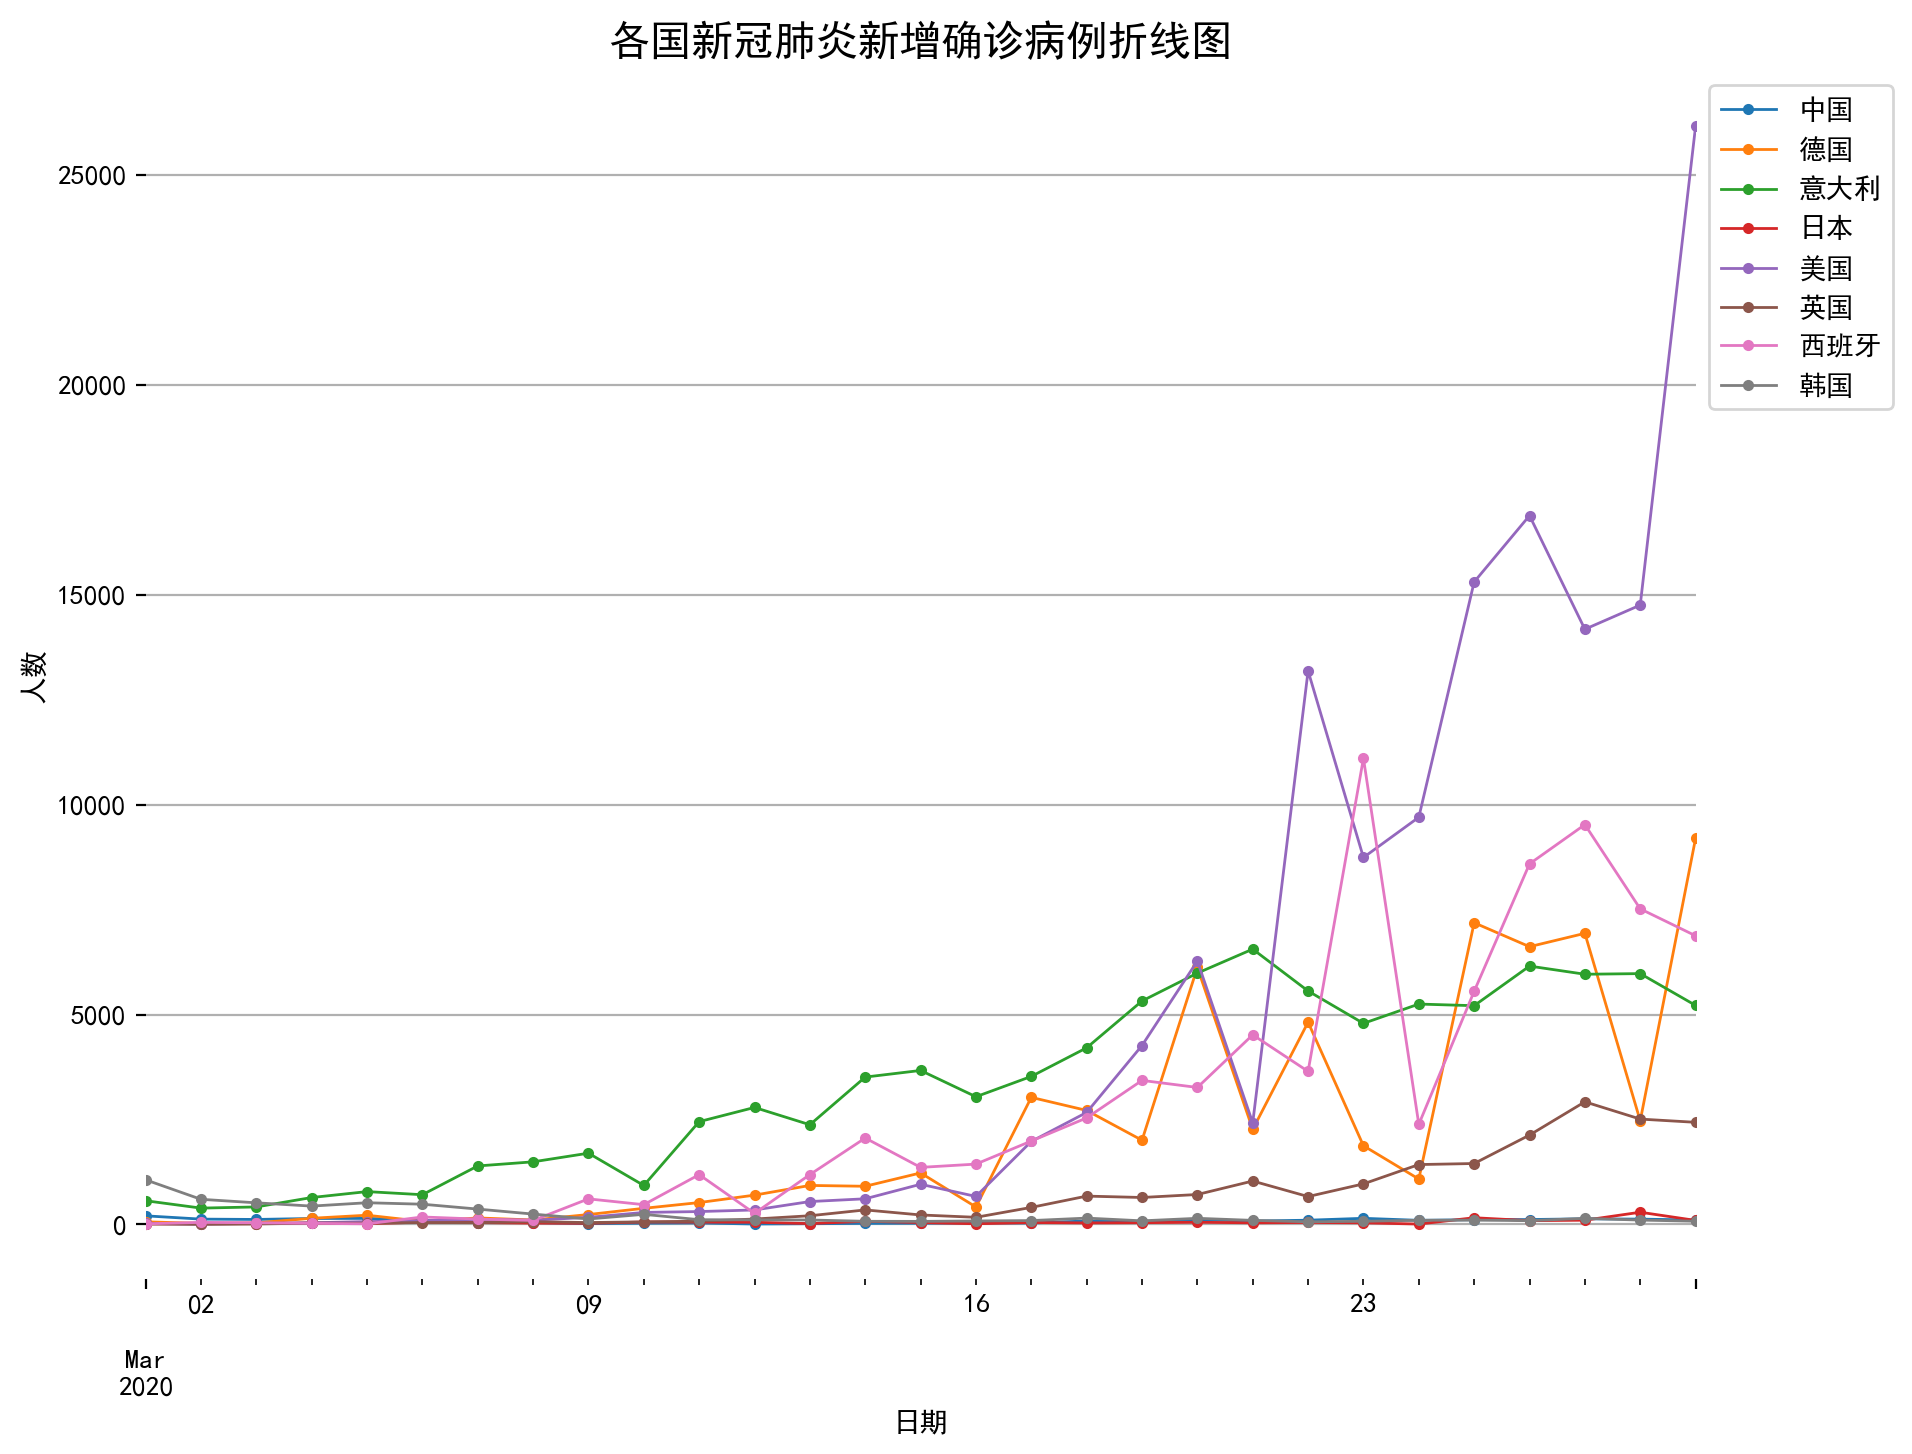

In [41]:
fig, ax = plt.subplots(figsize=(10,8),dpi=200)
data_part['2020-03':'2020-03-29'].groupby('名称')['当日新增确诊'].plot(legend=True,marker='o',ms=3,lw=1)
plt.title('各国新冠肺炎新增确诊病例折线图',size=15)
plt.ylabel('人数')
plt.grid(axis='y')
plt.box(False)
plt.legend(bbox_to_anchor = [1,1])

Text(0.5, 1.0, '日本新冠肺炎疫情折线图')

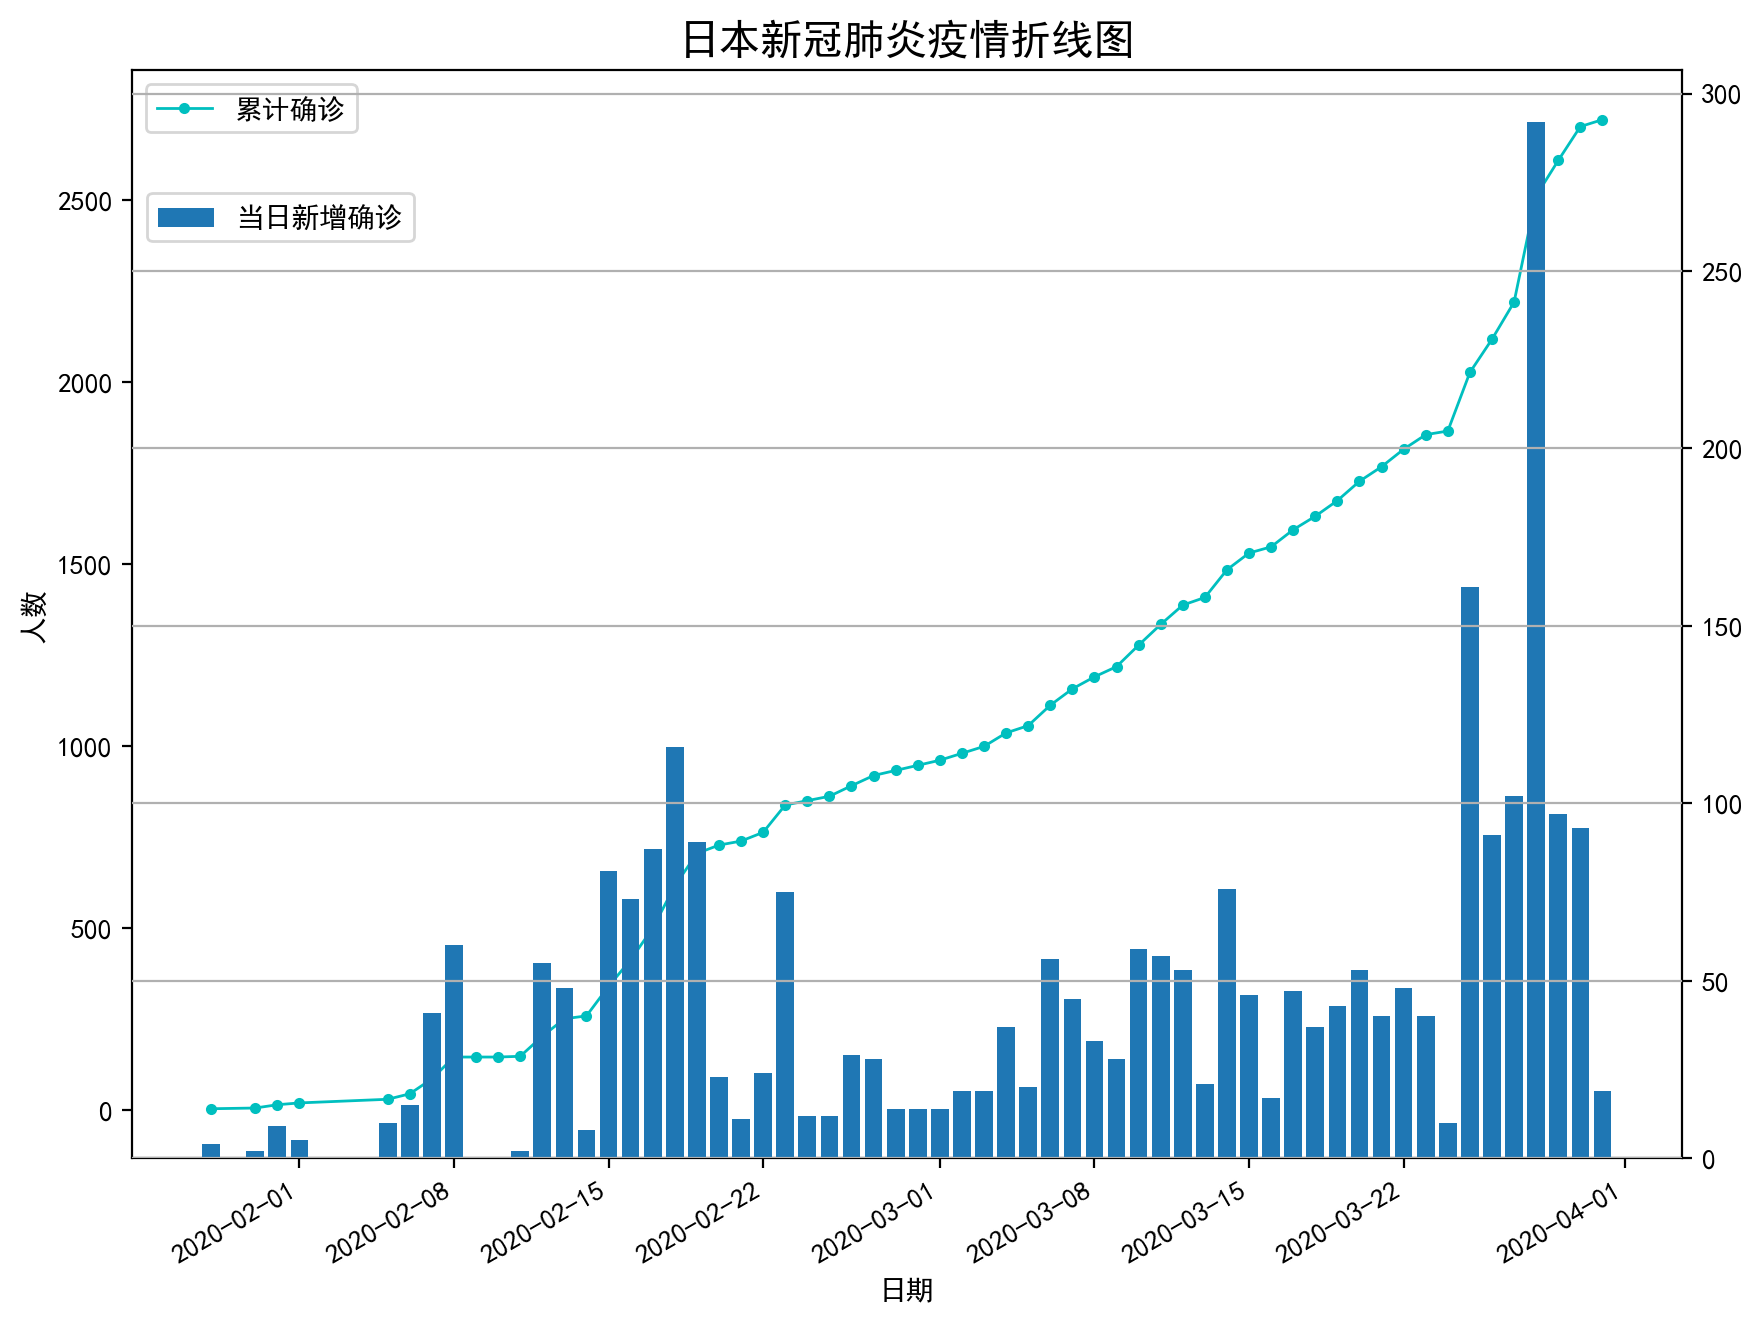

In [42]:
fig, ax = plt.subplots(figsize=(10,8),dpi=200)
japan = alltime_world[alltime_world['名称']=='日本']
japan['累计确诊'].plot(ax=ax, fontsize=10, style='-',lw=1,color='c',marker='o',ms=3,legend=True)
ax.set_ylabel('人数', fontsize=10)

# 产生一个ax的镜面坐标
ax1 = ax.twinx()
ax1.bar(japan.index, japan['当日新增确诊'])
ax1.legend(['当日新增确诊'],loc='upper left',bbox_to_anchor=(0.001, 0.9))
plt.grid(axis='y')
plt.box(False)
plt.title('日本新冠肺炎疫情折线图',size=15)